Load Data and concate to df_meta

In [40]:
!pip install python-dateutil


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [49]:
import pandas as pd
import os, glob
import numpy as np
folder = "DATA"
path = os.path.join(folder, "*.csv")
all_CSVs = glob.glob(path)
#print(path)
#print(all_CSVs)
#load all dfs an merge to one
df_meta = []
all_channel_names = []
df_meta = pd.DataFrame(df_meta)
for csv in all_CSVs: 
    print(csv)
    filename = os.path.basename(csv)
    if filename[-13:] == "automated.csv":
        channelName = filename.replace(filename[-14:], "")
        df = pd.read_csv(csv)
        df["Channel"]= channelName
        index = [i for i in range(len(df))]
        df.set_index([index, 'Channel'], inplace= True)
        #display(df)
        frames = [df_meta, df]
        df_meta = pd.concat(frames)
        if channelName not in all_channel_names:
            all_channel_names.append(channelName)
display("Das sind alle Kanäle")
display(all_channel_names)


DATA\ALLESUNDNICHTS_automated.csv
DATA\ALLESUNDNICHTS_manuel.csv
DATA\Der Wahrheit verpflichtet_automated.csv
DATA\Der Wahrheit verpflichtet_manuel.csv
DATA\Der Weg in deine Freiheit_automated.csv
DATA\Der Weg in deine Freiheit_manuel.csv
DATA\DRACHENTÖTER TV_automated.csv
DATA\DRACHENTÖTER TV_manuel.csv
DATA\Rettung der Menschheit TV_automated.csv
DATA\Rettung der Menschheit TV_manuel.csv
DATA\Schöpferwissen TV_automated.csv
DATA\Schöpferwissen TV_manuel.csv
DATA\UBC TV_automated.csv
DATA\UBC TV_manuel.csv
DATA\VEIT CLUB_automated.csv
DATA\VEIT CLUB_manuel.csv


'Das sind alle Kanäle'

['ALLESUNDNICHTS',
 'Der Wahrheit verpflichtet',
 'Der Weg in deine Freiheit',
 'DRACHENTÖTER TV',
 'Rettung der Menschheit TV',
 'Schöpferwissen TV',
 'UBC TV',
 'VEIT CLUB']

Tricks:

In [50]:
#get only one channel
df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
df_meta.columns

Wahrheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Wahrheit verpflichtet"]
Schöpfer = df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
Alles = df_meta.loc[df_meta.index.get_level_values("Channel") == "ALLESUNDNICHTS"]
Drachentöter = df_meta.loc[df_meta.index.get_level_values("Channel") == "DRACHENTÖTER TV"]
Freiheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Weg in deine Freiheit"]
Rettung = df_meta.loc[df_meta.index.get_level_values("Channel") == 'Rettung der Menschheit TV']
UBC = df_meta.loc[df_meta.index.get_level_values("Channel") == 'UBC TV']
VeitClub = df_meta.loc[df_meta.index.get_level_values("Channel") == 'VEIT CLUB']


## Compare Channels

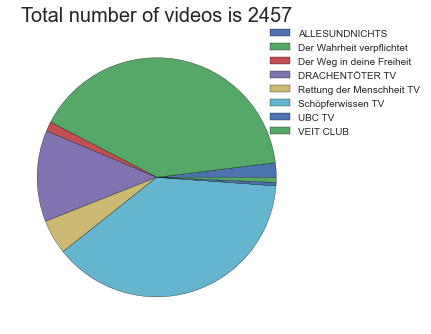

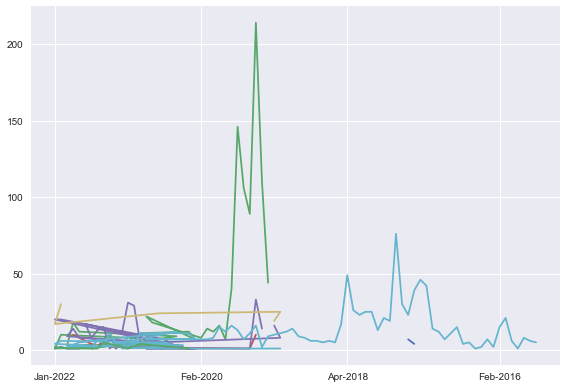

In [48]:
import matplotlib.pyplot as plt
import datetime as date
import dateutil
Title = "Total number of videos is "+ str(len(df_meta))  
#TO ADD letztes Upload              
number_of_vids =[]
for name in all_channel_names:
    number_of_vids.append(len(df_meta.loc[df_meta.index.get_level_values("Channel") == name]));
cumsum = np.cumsum(number_of_vids)
explode = [0.1]*8
              


Title = "Total number of videos is "+ str(len(df_meta)) 
fi1, ax1 = plt.subplots(nrows=1, ncols =1)
fi2, ax2 = plt.subplots(nrows=1, ncols =1)
#ax1.title(Title)
ax1.set_title(Title, loc="center",fontsize=20)
ax1.pie(number_of_vids, radius=1, wedgeprops={ "edgecolor": "black"}, textprops={'fontsize': 11})
ax1.legend(all_channel_names, bbox_to_anchor=(0.85,1.025), loc="upper left")

for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    ax2.plot(df.groupby(pd.to_datetime(df["publish_date"]).dt.strftime('%b-%Y'), sort=False
              )["title"].size())
#df.groupby(pd.to_datetime(df['Date']).dt.strftime('%b-%Y'), sort=False)['Rep'].size().plot()
#ax2.plot()
plt.style.use("seaborn")
plt.tight_layout()
plt.xticks([0,24,48,73])
plt.show()

## Woher kommen die Videos?

In [51]:
print("bub")
count = 0
print(df_meta.index)
#df_meta_drop_Warheit = df_meta.iloc["Der Wahrheit verpflichtet"]
#print(df_meta_drop_Warheit)
for title in Wahrheit["title"]: 
    #print(title)
    for titleS in df_meta["title"]:
        if title == titleS:
            count += 1
            print("doppletes Video %s" %title)
print(count)

bub
MultiIndex([( 0, 'ALLESUNDNICHTS'),
            ( 1, 'ALLESUNDNICHTS'),
            ( 2, 'ALLESUNDNICHTS'),
            ( 3, 'ALLESUNDNICHTS'),
            ( 4, 'ALLESUNDNICHTS'),
            ( 5, 'ALLESUNDNICHTS'),
            ( 6, 'ALLESUNDNICHTS'),
            ( 7, 'ALLESUNDNICHTS'),
            ( 8, 'ALLESUNDNICHTS'),
            ( 9, 'ALLESUNDNICHTS'),
            ...
            ( 7,      'VEIT CLUB'),
            ( 8,      'VEIT CLUB'),
            ( 9,      'VEIT CLUB'),
            (10,      'VEIT CLUB'),
            (11,      'VEIT CLUB'),
            (12,      'VEIT CLUB'),
            (13,      'VEIT CLUB'),
            (14,      'VEIT CLUB'),
            (15,      'VEIT CLUB'),
            (16,      'VEIT CLUB')],
           names=[None, 'Channel'], length=2457)
doppletes Video How to Make Youtube Money
doppletes Video Weiterhin unbeständiges Wetter - Windböen Tanz
doppletes Video It was never illegal to do so - History of Law
doppletes Video Through the window
dopplet

doppletes Video TUN - Tugend unsere Norm
doppletes Video Garden Eden - muss man noch weiter Reden?
doppletes Video Unsere schöne bunte Welt - Sommer, Sonne, Sonnenschein...Oder Nicht!
doppletes Video Und weiter geht die Reise
doppletes Video Neue Generation - UBC unabellacompania
doppletes Video Frontier | das Spiegelbild der Menscheit
doppletes Video Gänsehaut | Ein gruseliges Abenteuer mit dem Körper |
doppletes Video Internet Duell | Schöpferwiesen TV gegen Schöpferwissen TV | Wer gewinnt?
doppletes Video Kennst Du Dich - Wer bist Du ?
doppletes Video Ausserirdische Information - Von einer ganz anderen Welt
doppletes Video Einer kam, sah und siegt
doppletes Video Das Tun von Thomas adF Veit zeigt seine Wirkung - Statement
doppletes Video Botschaft von Thomas a.d.F. Veit an die Menschen 2
doppletes Video Botschaft von Thomas a.d.F. Veit an die Menschen
doppletes Video UBC-TV - Entprogrammierung international
doppletes Video Creator Monkeys TV - Back to the roods
doppletes Video Selbs